# Texas employees salary prediction 

## steps to predict the algorithams 

# This Project is for the salary Prediction

### Problem statement : Can you accurately predict the salary?

### Project id : PRCP-1024-salary 

### Team id : PTID-CDS-JAN21-1083

#### Teammates

1)goutam rathod <br>
2)jeyanti <br>
3)Daksha pnadey <br>
4)aravind <br>

# Import Basic Modules

In [7]:
# import libraryes 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Reading CSV file

In [8]:
data=pd.read_csv('/content/drive/MyDrive/salary.csv')

In [9]:
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [10]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


# Getting information of dataset

In [11]:
data.shape

(149481, 21)

In [12]:
missing_data=data.isnull().sum()/data.shape[0]*100
missing_data

AGENCY                      0.000000
AGENCY NAME                 0.000000
LAST NAME                   0.000000
FIRST NAME                  0.000000
MI                          0.000000
CLASS CODE                  0.000000
CLASS TITLE                 0.000000
ETHNICITY                   0.000000
GENDER                      0.000000
STATUS                      0.000000
EMPLOY DATE                 0.000000
HRLY RATE                   0.000000
HRS PER WK                  0.000000
MONTHLY                     0.000000
ANNUAL                      0.000000
STATE NUMBER                0.000000
duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [13]:
data_new=data.dropna(axis=1)
data_new.keys()

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [154]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AGENCY       149481 non-null  int64  
 1   LASTNAME     149481 non-null  object 
 2   FIRSTNAME    149481 non-null  object 
 3   MI           149481 non-null  int64  
 4   CLASSCODE    149481 non-null  object 
 5   CLASSTITLE   149481 non-null  object 
 6   ETHNICITY    149481 non-null  object 
 7   GENDER       149481 non-null  object 
 8   STATUS       149481 non-null  object 
 9   EMPLOYDATE   149481 non-null  int64  
 10  HRLYRATE     149481 non-null  float64
 11  HRSPERWK     149481 non-null  float64
 12  MONTHLY      149481 non-null  float64
 13  ANNUAL       149481 non-null  float64
 14  STATENUMBER  149481 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 17.1+ MB


# rename columns 

In [14]:
data_new.columns=['AGENCY','AGENCYNAME','LASTNAME','FIRSTNAME','MI','CLASSCODE','CLASSTITLE','ETHNICITY','GENDER','STATUS','EMPLOYDATE','HRLYRATE','HRSPERWK','MONTHLY','ANNUAL','STATENUMBER']

In [15]:
data_new

,AGENCY,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490


# encoding the date 

In [16]:
import datetime
data_new['EMPLOYDATE']= data_new['EMPLOYDATE'].astype('datetime64[ns]')


In [17]:
from datetime import datetime,date
today=str(date.today())
data_new['Dummy']= datetime.strptime(today, '%Y-%m-%d')

In [18]:
data_new['EMPLOYDATE']= data_new['Dummy']-data_new['EMPLOYDATE']

In [19]:
data_new.drop('Dummy', axis=1, inplace=True)

In [20]:
data_new['EMPLOYDATE']= data_new['EMPLOYDATE'].dt.days

In [21]:
data_new

,AGENCY,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12083,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2238,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,412,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,930,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,263,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1236,0.00000,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2076,0.00000,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,3077,12.93000,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,11501,0.00000,40.0,5744.16,68929.92,123490


#  pandas profile importing 

In [24]:
#pip install pandas-profiling

In [25]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title="Pandas Profiling Report")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
#profile

In [26]:
numaric_data=data_new.select_dtypes(include=['int64','float64'])
numaric_data

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,12083,75.96150,29.0,9545.82,114549.84,127717
1,212,2238,81.04454,4.0,1404.77,16857.24,127717
2,241,412,75.96150,29.0,9545.82,114549.84,59115
3,212,930,81.04453,4.0,1404.77,16857.24,59115
4,696,263,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...
149476,809,1236,0.00000,40.0,2899.00,34788.00,770781
149477,809,2076,0.00000,40.0,5500.00,66000.00,847431
149478,809,3077,12.93000,20.0,1120.60,13447.20,34266
149479,809,11501,0.00000,40.0,5744.16,68929.92,123490


# visulization of numaric data 

In [27]:
#sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
           # "legend.fontsize":12})
#plt.figure(figsize=(12,10))

#txt = "Statistical Analysis of Numerical type data"
#x = txt.center(134)
#print(f"\033[1m\n{x}\n")

#for index,cols in enumerate(numaric_data):
    #plt.subplot(3,3,index+1)
    #sns.distplot(numaric_data.loc[:,cols],kde=True,bins=30)
#plt.tight_layout(pad=2)

In [28]:
#plt.figure(figsize=(20,15))
#sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":14,"ytick.labelsize":12,
           # "legend.fontsize":12})

#plt.subplot(3, 3, 1)
#sns.scatterplot(data_new["AGENCY"],data_new["ANNUAL"])
#plt.title("\nAgency vs Annual\n",fontweight="bold")
#plt.ylabel("annual\n")

#plt.subplot(3, 3, 2)
#sns.barplot(data_new["GENDER"],data_new["ANNUAL"])
#plt.title("\nGender vs Annual\n",fontweight="bold")
#plt.ylabel("Annual\n")


In [29]:
#plt.figure(figsize=(20,15))

#sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":13,"xtick.labelsize":12,"ytick.labelsize":10,
            #"legend.fontsize":12})

#plt.subplot(2, 2, 1)
#sns.scatterplot(data_new["HRLY RATE"],data_new["ANNUAL"])
#plt.title("\nANNUAL Salary on the basis of HRLYRATE\n",fontsize=15,fontweight="bold")
#plt.ylabel("ANNUAL Salary\n")

#plt.subplot(2, 2, 2)
#sns.scatterplot(data_new["HRS PER WK"],data_new["ANNUAL"])
#plt.title("\nANNUAL Salary on the basis of HRSPERWK\n",fontsize=15,fontweight="bold")
#plt.ylabel("ANNUAL Salary\n")

In [30]:
#plt.figure(figsize=(10,10))
#sns.displot(data_new, x="EMPLOY DATE", binwidth=100,bins=10)

In [31]:
#sns.displot(data_new, x="HRLY RATE", binwidth=15)

In [32]:
#sns.displot(data_new, x="HRS PER WK", binwidth=5)

In [33]:
#sns.displot(data_new, x="MONTHLY", binwidth=10,bins=10)

In [34]:
#sns.displot(data_new, x="ANNUAL", binwidth=35)

In [35]:
#sns.displot(data_new, x="STATE NUMBER", binwidth=35,bins=30)

# Bivariate analysis 

In [36]:
#sns.displot(data_new, x="AGENCY", y="ANNUAL", kind="kde")

In [37]:
#sns.displot(data_new, x="EMPLOY DATE", y="ANNUAL", kind="kde")

In [38]:
#sns.displot(data_new, x="HRLY RATE", y="ANNUAL", kind="kde")

In [39]:
#sns.displot(data_new, x="HRS PER WK", y="ANNUAL", kind="kde")

In [40]:
#sns.displot(data_new, x="STATE NUMBER", y="ANNUAL", kind="kde")

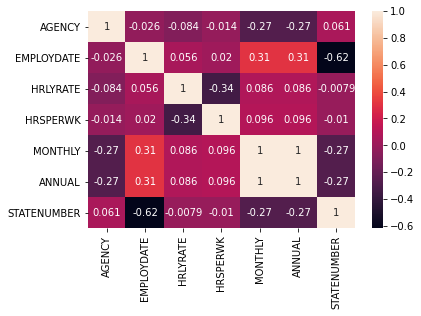

In [41]:
sns.heatmap(data_new.corr(),annot=True)

In [42]:
data_new.corr().style.background_gradient(cmap='coolwarm')

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
AGENCY,1.000000,-0.026442,-0.083653,-0.013847,-0.266452,-0.266452,0.060815
EMPLOYDATE,-0.026442,1.000000,0.055676,0.019889,0.306137,0.306137,-0.619048
HRLYRATE,-0.083653,0.055676,1.000000,-0.337784,0.086291,0.086291,-0.007922
HRSPERWK,-0.013847,0.019889,-0.337784,1.000000,0.096041,0.096041,-0.010072
MONTHLY,-0.266452,0.306137,0.086291,0.096041,1.000000,1.000000,-0.265438
ANNUAL,-0.266452,0.306137,0.086291,0.096041,1.000000,1.000000,-0.265438
STATENUMBER,0.060815,-0.619048,-0.007922,-0.010072,-0.265438,-0.265438,1.000000


In [43]:
#plt.figure(figsize=(20,10))
#sns.lineplot(data=data_new)
#plt.show()

In [44]:
categorical_data=data_new.select_dtypes(exclude=['int64','float64'])
categorical_data

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [45]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="AGENCY NAME", y="ANNUAL",data=data_new)

In [46]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="LAST NAME", y="ANNUAL",data=data_new)

In [47]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="FIRST NAME", y="ANNUAL",data=data_new)

In [48]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="MI", y="ANNUAL",data=data_new)

In [49]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="CLASS CODE", y="ANNUAL",data=data_new)

In [50]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="CLASS TITLE", y="ANNUAL",data=data_new)

In [51]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="ETHNICITY", y="ANNUAL",data=data_new)

In [52]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="GENDER", y="ANNUAL",data=data_new)

In [53]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="STATUS", y="ANNUAL",data=data_new)

# catagorical encoding 

In [54]:
categorical_data

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [55]:
for col in data_new.columns:
    print(col,':',len(data_new[col].unique()),'labels')

AGENCY : 113 labels
AGENCYNAME : 113 labels
LASTNAME : 38675 labels
FIRSTNAME : 23559 labels
MI : 27 labels
CLASSCODE : 1481 labels
CLASSTITLE : 1422 labels
ETHNICITY : 6 labels
GENDER : 2 labels
STATUS : 11 labels
EMPLOYDATE : 6295 labels
HRLYRATE : 206 labels
HRSPERWK : 58 labels
MONTHLY : 40552 labels
ANNUAL : 40554 labels
STATENUMBER : 149465 labels


In [56]:
#data_new[['AGENCYNAME']].value_counts().sort_values(ascending=False).head(50)
data_new.drop('AGENCYNAME',axis=1,inplace=True)

# frequency encoding 

In [57]:
class_encoding=categorical_data['CLASSCODE'].value_counts().to_dict()

In [58]:
class_encoding

{'4504    ': 9267,
 '4505    ': 7895,
 '4503    ': 4718,
 '5622    ': 3646,
 '5121    ': 3307,
 '9928    ': 2251,
 '5026    ': 1854,
 '5023    ': 1778,
 '0154    ': 1774,
 '4510    ': 1743,
 '0055    ': 1727,
 '0152    ': 1693,
 '5151    ': 1578,
 '0156    ': 1466,
 '5122    ': 1433,
 '5025    ': 1348,
 '2123    ': 1308,
 '2122    ': 1265,
 '0057    ': 1262,
 '1574    ': 1227,
 '0150    ': 1169,
 '5620    ': 1117,
 '0171    ': 1102,
 '9940    ': 1102,
 '1572    ': 1083,
 '1573    ': 1039,
 '0172    ': 1034,
 '4541    ': 1007,
 '5024    ': 976,
 '1603    ': 870,
 '1575    ': 857,
 '4411    ': 857,
 '5505    ': 827,
 '2128    ': 794,
 '1604    ': 771,
 '1621    ': 765,
 '4511    ': 744,
 '5624    ': 741,
 '4412    ': 696,
 '2129    ': 696,
 '2127    ': 690,
 '1601    ': 688,
 '5017    ': 682,
 '5123    ': 669,
 '9022    ': 661,
 '0059    ': 627,
 '1353    ': 622,
 '2119    ': 616,
 '1622    ': 589,
 '9055    ': 588,
 '0256    ': 583,
 '4540    ': 569,
 '4413    ': 569,
 '5702    ': 567,


In [59]:

categorical_data['CLASSCODE']=categorical_data['CLASSCODE'].map(class_encoding)
categorical_data.head(20)

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,324,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,47,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,324,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,47,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,9267,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,372,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,354,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,372,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,1,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,463,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [60]:
class_title_encoding=categorical_data['CLASSTITLE'].value_counts().to_dict()

In [61]:
class_title_encoding

{'CORREC  OFFICER IV                                ': 9267,
 'CORREC  OFFICER V                                 ': 7895,
 'CORREC OFFCR III                                  ': 4718,
 'TEXAS WORKS ADVISOR II                            ': 3646,
 'DIRECT SUPPORT PROFESSIONAL I                     ': 3307,
 'TROOPER                                           ': 2251,
 'CHILD PROTECTIVE SVCS SPEC IV                     ': 1854,
 'CHILD PROTECTIVE SVCS SPEC I                      ': 1773,
 'ADMINISTRATIVE ASST III                           ': 1771,
 'SGT OF CORREC OFFCRS                              ': 1743,
 'CLERK I                                           ': 1727,
 'ADMINISTRATIVE ASST II                            ': 1690,
 'PSYCHIATRIC NURSING ASST I                        ': 1578,
 'ADMINISTRATIVE ASST IV                            ': 1465,
 'DIRECT SUPPORT PROF II                            ': 1433,
 'CHILD PROTECTIVE SVCS SPEC III                    ': 1348,
 'ENGINEERING TECHNICIAN

In [62]:
categorical_data['CLASSTITLE']=categorical_data['CLASSTITLE'].map(class_title_encoding)
categorical_data.head(20)

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [63]:
data_new.replace(' ','other',inplace=True)

In [64]:
ordinal_labels=data_new.groupby(['MI'])['ANNUAL'].mean().sort_values().index
ordinal_labels

Index(['O', 'U', 'N', 'I', 'Y', 'Q', 'other', 'Z', 'L', 'M', 'D', 'V', 'S',
       'A', 'R', 'G', 'K', 'J', 'E', 'F', 'C', 'T', 'P', 'B', 'X', 'W', 'H'],
      dtype='object', name='MI')

In [65]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'A': 13,
 'B': 23,
 'C': 20,
 'D': 10,
 'E': 18,
 'F': 19,
 'G': 15,
 'H': 26,
 'I': 3,
 'J': 17,
 'K': 16,
 'L': 8,
 'M': 9,
 'N': 2,
 'O': 0,
 'P': 22,
 'Q': 5,
 'R': 14,
 'S': 12,
 'T': 21,
 'U': 1,
 'V': 11,
 'W': 25,
 'X': 24,
 'Y': 4,
 'Z': 7,
 'other': 6}

In [66]:
data_new['MI']=data_new['MI'].map(ordinal_labels2)
data_new.head(20)

,AGENCY,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,RUCKER,MORTON,11,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12083,75.96150,29.0,9545.82,114549.84,127717
1,212,RUCKER,MORTON,11,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2238,81.04454,4.0,1404.77,16857.24,127717
2,241,SPECIA JR,JOHN,17,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,412,75.96150,29.0,9545.82,114549.84,59115
3,212,SPECIA JR,JOHN,17,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,930,81.04453,4.0,1404.77,16857.24,59115
4,696,ONTIVEROS,ESTHER,6,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,263,0.00000,40.0,3284.27,39411.24,165030
5,302,ROGERS,SHAUNA,6,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,352,0.00000,40.0,12899.00,154788.00,1177785
6,601,RICHTER,WILLIAM,17,1984,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,270,0.00000,40.0,5835.50,70026.00,1085586
7,510,SPINKS,DARREL,10,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,383,0.00000,40.0,10000.00,120000.00,147334
8,520,SPINKS,DARREL,10,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,380,49.40717,20.0,4281.95,51383.40,147334
9,537,ADAMS III,LEE,13,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,565,0.00000,40.0,3447.25,41367.00,129635


In [67]:
categorical_data['ETHNICITY']=data_new['ETHNICITY']
categorical_data['STATUS']=data_new['STATUS']

In [68]:
categorical_data.drop('FIRSTNAME',axis=1,inplace=True)

In [69]:
categorical_data.head(20)

,AGENCYNAME,LASTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [70]:
categorical_data.drop('LASTNAME',axis=1,inplace=True)

In [71]:
categorical_data.head(20)

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [72]:
categorical_data['GENDER']=data_new['GENDER']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_data['GENDER']=encoder.fit_transform(categorical_data['GENDER'])

In [73]:
categorical_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,WHITE,1,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,WHITE,1,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,WHITE,1,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,WHITE,1,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,HISPANIC,0,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,P,385,385,WHITE,1,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,A,48,48,WHITE,0,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,C,221,221,WHITE,1,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,R,1083,1082,WHITE,1,CRF - CLASSIFIED REGULAR FULL-TIME


In [74]:
encoded_categorcal_data=pd.get_dummies(categorical_data,columns=['ETHNICITY','STATUS'],drop_first=True,)

In [75]:
encoded_categorcal_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,P,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149477,STATE PRESERVATION BOARD ...,A,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149478,STATE PRESERVATION BOARD ...,C,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
149479,STATE PRESERVATION BOARD ...,R,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [76]:
encoded_categorcal_data['MI']=data_new['MI']

In [77]:
encoded_categorcal_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",11,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,OFFICE OF COURT ADMINISTRATION ...,11,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",17,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,OFFICE OF COURT ADMINISTRATION ...,17,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,6,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,22,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149477,STATE PRESERVATION BOARD ...,13,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149478,STATE PRESERVATION BOARD ...,20,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
149479,STATE PRESERVATION BOARD ...,14,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
after_EDA_data=pd.concat([encoded_categorcal_data,numaric_data],axis=1)

In [79]:
after_EDA_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",11,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,241,12083,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,11,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,212,2238,81.04454,4.0,1404.77,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",17,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,241,412,75.96150,29.0,9545.82,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,17,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,212,930,81.04453,4.0,1404.77,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,6,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,696,263,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,22,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,1236,0.00000,40.0,2899.00,34788.00,770781
149477,STATE PRESERVATION BOARD ...,13,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,2076,0.00000,40.0,5500.00,66000.00,847431
149478,STATE PRESERVATION BOARD ...,20,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,809,3077,12.93000,20.0,1120.60,13447.20,34266
149479,STATE PRESERVATION BOARD ...,14,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,11501,0.00000,40.0,5744.16,68929.92,123490


In [81]:
categorical_data.drop('AGENCYNAME',axis=1,inplace=True)

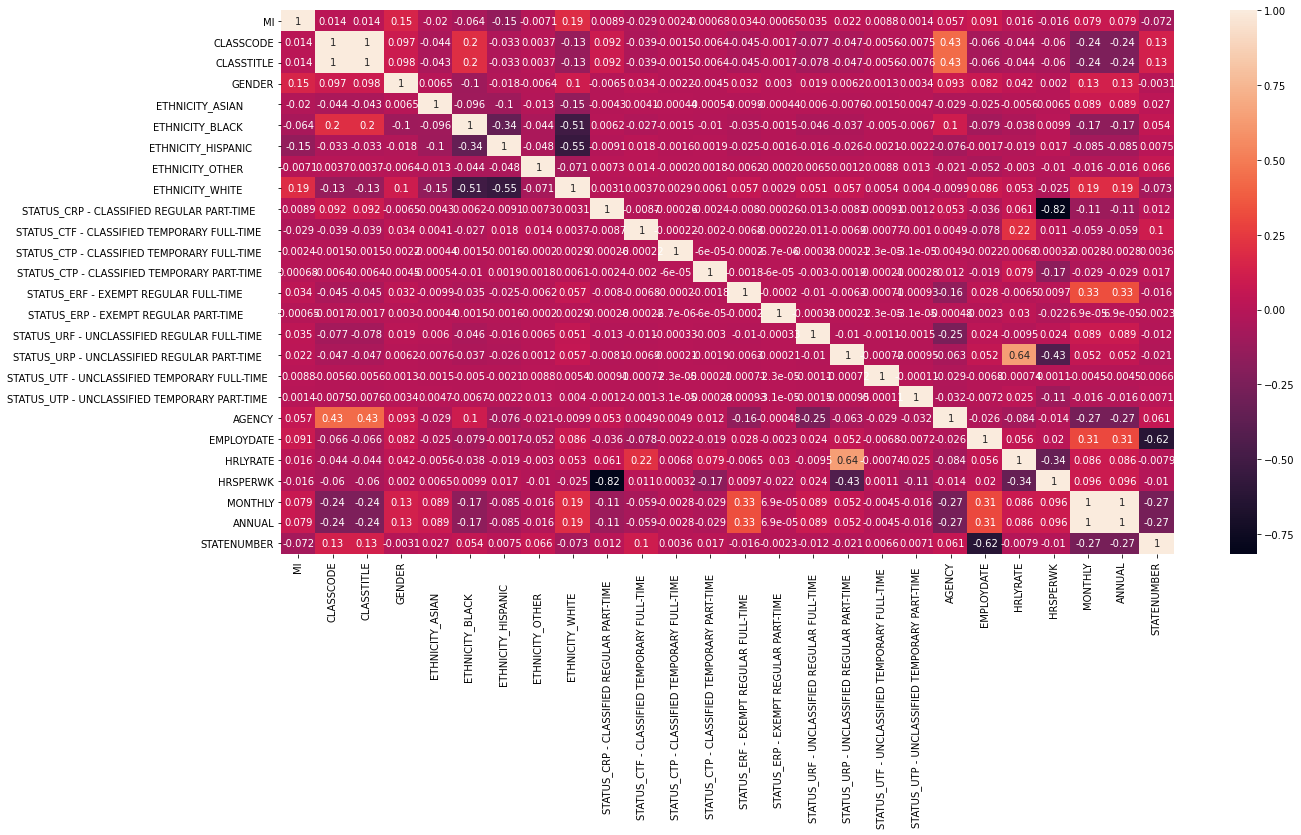

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(after_EDA_data.corr(),annot=True)

# Data preprocessing 

In [83]:
from scipy.stats import skew
print(numaric_data['HRLYRATE'].skew())
numaric_data['HRSPERWK'].skew()

15.91809864054434


-8.379277707265828

In [84]:
skwed_data_check=numaric_data

In [85]:
skwed_data_check

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,12083,75.96150,29.0,9545.82,114549.84,127717
1,212,2238,81.04454,4.0,1404.77,16857.24,127717
2,241,412,75.96150,29.0,9545.82,114549.84,59115
3,212,930,81.04453,4.0,1404.77,16857.24,59115
4,696,263,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...
149476,809,1236,0.00000,40.0,2899.00,34788.00,770781
149477,809,2076,0.00000,40.0,5500.00,66000.00,847431
149478,809,3077,12.93000,20.0,1120.60,13447.20,34266
149479,809,11501,0.00000,40.0,5744.16,68929.92,123490


In [86]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [87]:
#skwed_data_check['HRLY RATE']=np.sqrt(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [88]:
#skwed_data_check['HRLY RATE']=np.box-cox(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [89]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [90]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [91]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

# outliers 

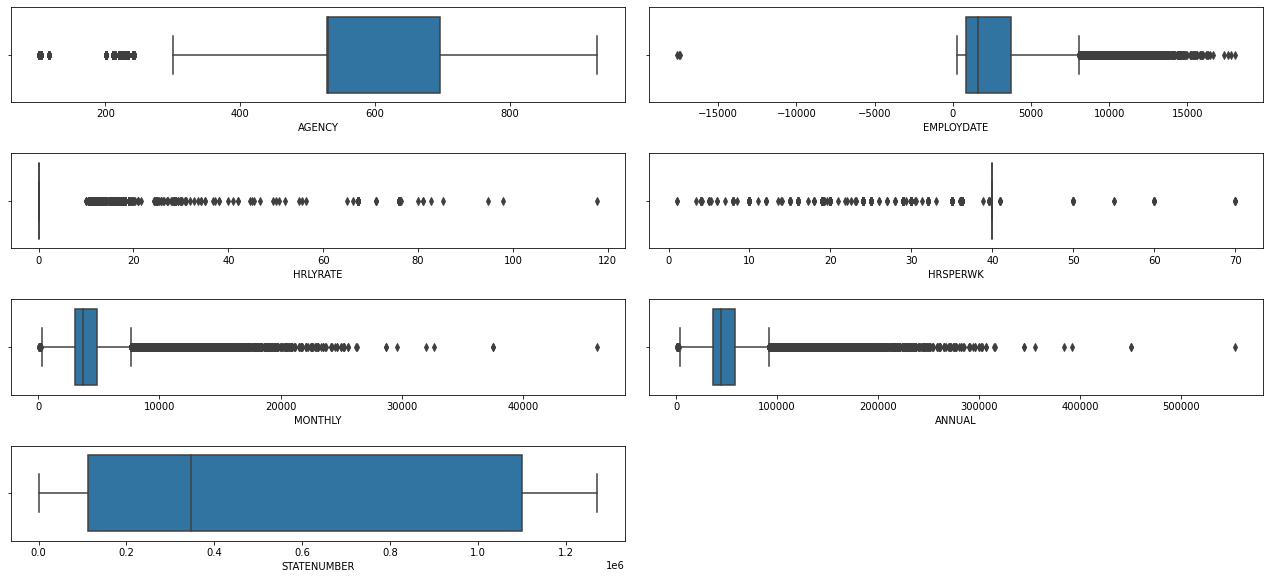

In [92]:
plt.figure(figsize=(18,10))
for index,cols in enumerate(numaric_data):
    plt.subplot(5,2,index+1)
    sns.boxplot(numaric_data.loc[:,cols])
plt.tight_layout(pad=2)

In [93]:
print(numaric_data['EMPLOYDATE'].median())
print(numaric_data['HRLYRATE'].median())
print(numaric_data["HRSPERWK"].median())
print(numaric_data["MONTHLY"].median())
print(numaric_data["ANNUAL"].median())

1621.0
0.0
40.0
3720.17
44642.04


In [94]:
mean = np.mean(numaric_data["AGENCY"]) 
std = np.std(numaric_data["AGENCY"]) 
threshold = 3.5
outlier = [] 
for i in numaric_data["AGENCY"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in charges are ', outlier) 

Outlier in charges are  []


In [95]:
mean = np.mean(numaric_data['EMPLOYDATE']) 
std = np.std(numaric_data['EMPLOYDATE']) 
threshold = 3.5
outlier1 = [] 
for i in numaric_data['EMPLOYDATE']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier1.append(i) 
print('\033[1mOutlier in charges are ', outlier1)
for i in numaric_data:
    numaric_data.replace(i,1616.0)

Outlier in charges are  [12083, 14079, 12709, 16229, 12903, 11826, 11323, 13689, 11341, 11765, 12223, 14444, 12947, 11321, 12065, 11638, 11369, 15215, 13112, 13714, 11765, 13957, 13226, 12246, 12496, 13684, 15418, 11518, 11675, 11765, 12496, 14102, 12496, 11645, 11765, 13139, 11875, 11475, 13226, 12983, 11765, 11765, 13682, 13574, 16194, 11944, 13090, 13713, 11310, 11734, 11417, 13226, 15905, 12496, 11763, 12849, 13245, 13957, 11908, 11897, 12496, 14529, 13486, 16636, 13436, 12496, 11764, 15905, 15495, 11765, 11765, 12496, 12983, 12527, 11341, 13957, 11641, 12527, 11788, 11732, 13643, 14079, 14590, 14723, 12496, 11887, 13954, 14686, 12496, 13592, 14687, 15600, 14441, 13957, 13853, 14049, 12969, 11765, 13014, 13652, 11393, 14567, 12496, 12425, 11494, 11765, 14079, 13226, 11765, 11785, 13811, 13674, 11369, 11960, 13440, 11449, 13014, 11595, 13514, 12526, 11456, 11533, 12142, 11603, 11616, 11750, 11431, 12253, 11369, 12933, 12037, 11750, 11369, 12365, 12162, 11750, 13325, 11522, 12212, 12

In [96]:
mean = np.mean(numaric_data['HRLYRATE']) 
std = np.std(numaric_data['HRLYRATE']) 
threshold = 3.5
outlier2 = [] 
for i in numaric_data['HRLYRATE']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier2.append(i) 
print('\033[1mOutlier in charges are ', outlier2) 
for i in numaric_data:
    numaric_data.replace(i,0.0)

Outlier in charges are  [75.9615, 81.04454, 75.9615, 81.04453000000002, 49.40717, 28.58, 25.0, 17.33, 20.000020000000006, 30.16251, 16.01272, 19.0, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 67.30765, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.96

In [97]:
mean = np.mean(numaric_data["HRSPERWK"]) 
std = np.std(numaric_data["HRSPERWK"]) 
threshold = 3.5
outlier3 = [] 
for i in numaric_data["HRSPERWK"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier3.append(i) 
print('\033[1mOutlier in charges are ', outlier3) 
for i in numaric_data:
    numaric_data.replace(i,40.0)

Outlier in charges are  [50.0, 60.0, 55.0, 60.0, 50.0, 70.0, 55.0, 60.0, 70.0, 50.0, 60.0, 70.0, 50.0, 50.0, 50.0, 60.0, 50.0, 70.0, 60.0, 50.0]


In [98]:
mean = np.mean(numaric_data["MONTHLY"]) 
std = np.std(numaric_data["MONTHLY"]) 
threshold = 3.5
outlier4 = [] 
for i in numaric_data["MONTHLY"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier4.append(i) 
print('\033[1mOutlier in charges are ', outlier4) 
for i in numaric_data:
    numaric_data.replace(i,3720.17)

Outlier in charges are  [12899.0, 13000.0, 17300.0, 12848.38, 14985.5, 14583.34, 12500.0, 13371.45, 14166.67, 12334.38, 11862.5, 14000.0, 16800.0, 16800.0, 16800.0, 16800.0, 16800.0, 16800.0, 17050.0, 16800.0, 16800.0, 16800.0, 16800.0, 17050.0, 15400.0, 16800.0, 15400.0, 14000.0, 15400.0, 12166.67, 12166.67, 12750.0, 12750.0, 12500.0, 13333.34, 12750.0, 16451.25, 12166.67, 11666.67, 11666.66, 12375.83, 12833.33, 12833.33, 12833.33, 12833.33, 15400.0, 12833.33, 15400.0, 15650.0, 12833.33, 15400.0, 15400.0, 12833.33, 15650.0, 12833.33, 15400.0, 12833.33, 15400.0, 12833.33, 15650.0, 12833.33, 15400.0, 14116.66, 14116.66, 15650.0, 14116.66, 15400.0, 14116.66, 12833.33, 15400.0, 15650.0, 12833.33, 15400.0, 15400.0, 15400.0, 12833.33, 12833.33, 12833.33, 12833.33, 12833.33, 14116.66, 14116.66, 15400.0, 15650.0, 12833.33, 12833.33, 15400.0, 15400.0, 15650.0, 13041.66, 12833.33, 15400.0, 15400.0, 14116.66, 15400.0, 15650.0, 15400.0, 15650.0, 15400.0, 14345.83, 12833.33, 15400.0, 15400.0, 1411

In [99]:
mean = np.mean(numaric_data["ANNUAL"]) 
std = np.std(numaric_data["ANNUAL"]) 
threshold = 3.5
outlier4 = [] 
for i in numaric_data["ANNUAL"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier4.append(i) 
print('\033[1mOutlier in charges are ', outlier4) 
for i in numaric_data:
    numaric_data.replace(i,44642.04)

Outlier in charges are  [154788.0, 156000.0, 207600.0, 154180.56, 179826.0, 175000.08, 150000.0, 160457.4, 170000.04, 148012.56, 142350.0, 168000.0, 201600.0, 201600.0, 201600.0, 201600.0, 201600.0, 201600.0, 204600.0, 201600.0, 201600.0, 201600.0, 201600.0, 204600.0, 184800.0, 201600.0, 184800.0, 168000.0, 184800.0, 146000.04, 146000.04, 153000.0, 153000.0, 150000.0, 160000.08, 153000.0, 197415.0, 146000.04, 140000.04, 139999.92, 148509.96, 153999.96, 153999.96, 153999.96, 153999.96, 184800.0, 153999.96, 184800.0, 187800.0, 153999.96, 184800.0, 184800.0, 153999.96, 187800.0, 153999.96, 184800.0, 153999.96, 184800.0, 153999.96, 187800.0, 153999.96, 184800.0, 169399.92, 169399.92, 187800.0, 169399.92, 184800.0, 169399.92, 153999.96, 184800.0, 187800.0, 153999.96, 184800.0, 184800.0, 184800.0, 153999.96, 153999.96, 153999.96, 153999.96, 153999.96, 169399.92, 169399.92, 184800.0, 187800.0, 153999.96, 153999.96, 184800.0, 184800.0, 187800.0, 156499.92, 153999.96, 184800.0, 184800.0, 169399

In [100]:
numaric_data.drop('MONTHLY',axis=1)

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,ANNUAL,STATENUMBER
0,241,12083,75.96150,29.0,114549.84,127717
1,212,2238,81.04454,4.0,16857.24,127717
2,241,412,75.96150,29.0,114549.84,59115
3,212,930,81.04453,4.0,16857.24,59115
4,696,263,0.00000,40.0,39411.24,165030
...,...,...,...,...,...,...
149476,809,1236,0.00000,40.0,34788.00,770781
149477,809,2076,0.00000,40.0,66000.00,847431
149478,809,3077,12.93000,20.0,13447.20,34266
149479,809,11501,0.00000,40.0,68929.92,123490


In [101]:
import scipy.stats as stat
import pylab
#### Q-Q plot
def plot_data(numaric_data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    numaric_data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(numaric_data[feature],dist='norm',plot=pylab)
    plt.show()

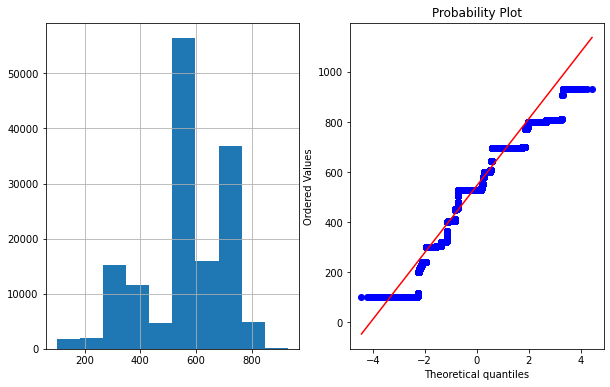

In [102]:
plot_data(numaric_data,'AGENCY')

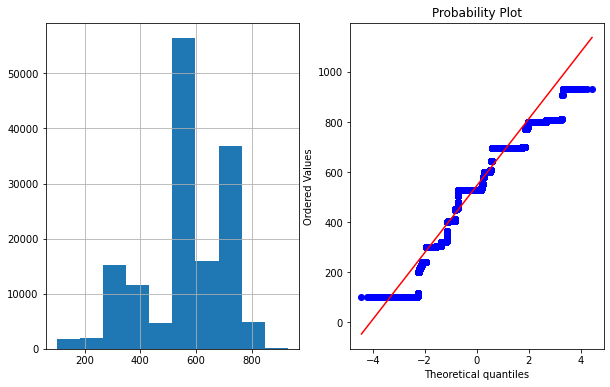

In [103]:
plot_data(numaric_data,'AGENCY')

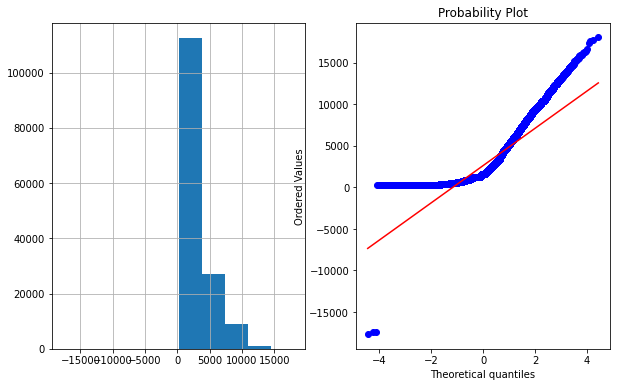

In [104]:
plot_data(numaric_data,'EMPLOYDATE')

In [105]:
numaric_data['EMPLOYDATE'].skew()#=np.log(numaric_data['EMPLOYDATE'])
#plot_data(numaric_data,'EMPLOYDATE')

1.4950306960005597

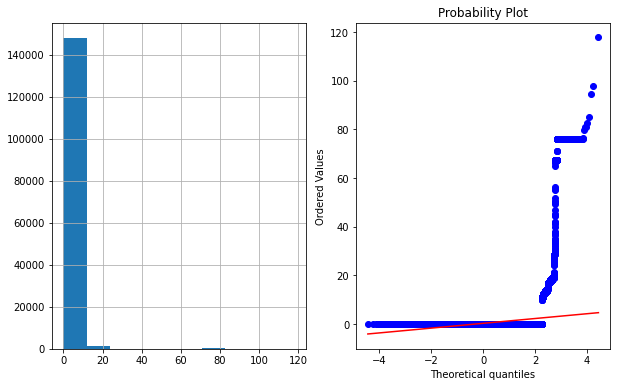

In [106]:
plot_data(numaric_data,'HRLYRATE')

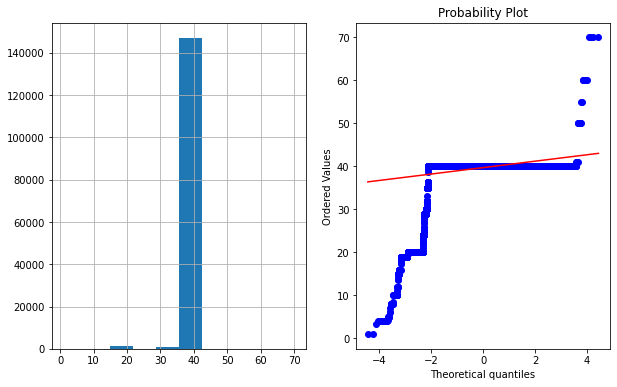

In [107]:
plot_data(numaric_data,'HRSPERWK')

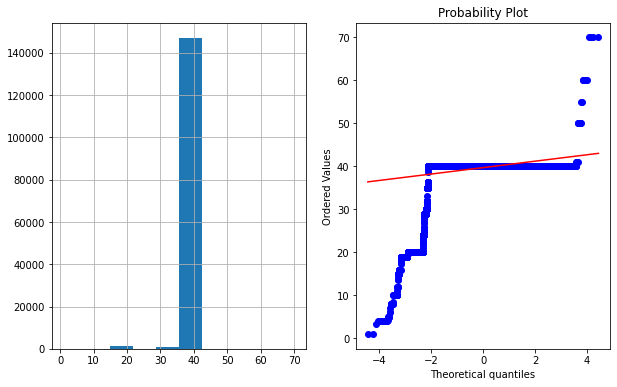

In [108]:
numaric_data['HRSPERWK_log']=np.sqrt(numaric_data['HRSPERWK'])
plot_data(numaric_data,'HRSPERWK')

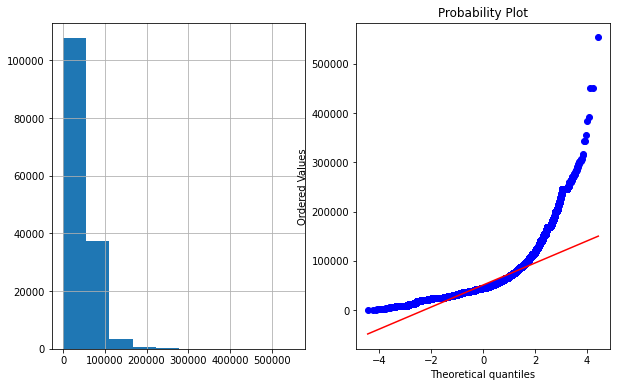

In [109]:
plot_data(numaric_data,'ANNUAL')

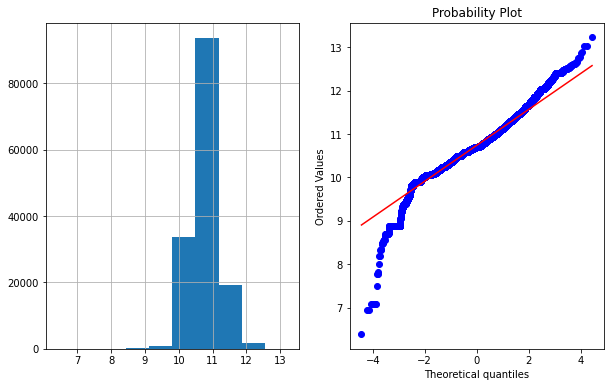

In [110]:
numaric_data['ANNUAL_log']=np.log(numaric_data['ANNUAL'])
plot_data(numaric_data,'ANNUAL_log')

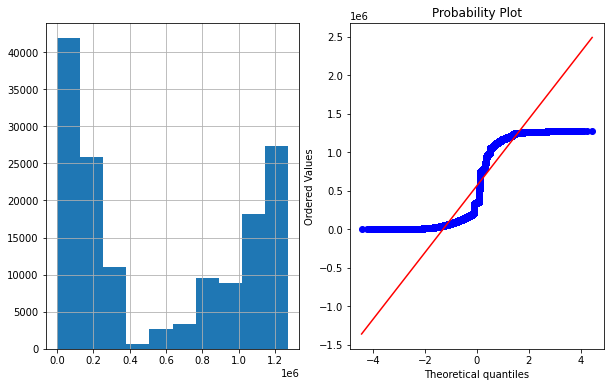

In [111]:
plot_data(numaric_data,'STATENUMBER')

In [112]:
after_EDA_data.drop('AGENCYNAME',axis=1,inplace=True)

In [113]:
after_EDA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   MI                                               149481 non-null  int64  
 1   CLASSCODE                                        149481 non-null  int64  
 2   CLASSTITLE                                       149481 non-null  int64  
 3   GENDER                                           149481 non-null  int64  
 4   ETHNICITY_ASIAN                                  149481 non-null  uint8  
 5   ETHNICITY_BLACK                                  149481 non-null  uint8  
 6   ETHNICITY_HISPANIC                               149481 non-null  uint8  
 7   ETHNICITY_OTHER                                  149481 non-null  uint8  
 8   ETHNICITY_WHITE                                  149481 non-null  uint8  
 9   STATUS_CRP - CL

# handling the imbalance data 

In [114]:
#pip install smogn

In [115]:
#import smogn

#df_smogn = smogn.smoter(data = after_EDA_data,y = 'ANNUAL'  ## string ('header name'))

# modeling 

In [116]:
X=after_EDA_data.iloc[:,:-1]

In [117]:
X

,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL
0,11,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,241,12083,75.96150,29.0,9545.82,114549.84
1,11,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,212,2238,81.04454,4.0,1404.77,16857.24
2,17,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,241,412,75.96150,29.0,9545.82,114549.84
3,17,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,212,930,81.04453,4.0,1404.77,16857.24
4,6,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,696,263,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,22,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,1236,0.00000,40.0,2899.00,34788.00
149477,13,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,2076,0.00000,40.0,5500.00,66000.00
149478,20,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,809,3077,12.93000,20.0,1120.60,13447.20
149479,14,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,809,11501,0.00000,40.0,5744.16,68929.92


In [118]:
y=after_EDA_data.iloc[:,-1]

In [119]:
y

0         127717
1         127717
2          59115
3          59115
4         165030
           ...  
149476    770781
149477    847431
149478     34266
149479    123490
149480    103583
Name: STATENUMBER, Length: 149481, dtype: int64

# feature scaling 

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_X=scaler.fit_transform(X)

In [121]:
#pd.DataFrame(scaled_data_X)

# feature selection 
## univariate selection

In [122]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [123]:
### Apply SelectKBest Algorithm
#ordered_rank_features=f_classif(score_func=chi2,k=20)
#ordered_feature=ordered_rank_features.fit(X,y)

In [124]:
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(scaled_data_X,Y,center=False)
from sklearn.feature_selection import SelectKBest
featureSelector = SelectKBest(score_func=f_regression,k=25)
featureSelector.fit(scaled_data_X,y)

SelectKBest(k=25, score_func=<function f_regression at 0x7fa9c8bcc5f0>)

In [125]:
dfscores=pd.DataFrame(featureSelector.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [126]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [127]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,MI,326.120782
1,CLASSCODE,1022.632579
2,CLASSTITLE,1022.270923
3,GENDER,0.616595
4,ETHNICITY_ASIAN,45.573619
5,ETHNICITY_BLACK,183.554873
6,ETHNICITY_HISPANIC,3.504099
7,ETHNICITY_OTHER,268.791251
8,ETHNICITY_WHITE,337.804327
9,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,8.938119


In [128]:
features_rank.nlargest(20,'Score')

,Features,Score
20,EMPLOYDATE,28481.552412
23,MONTHLY,4531.767049
24,ANNUAL,4531.767049
1,CLASSCODE,1022.632579
2,CLASSTITLE,1022.270923
10,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,644.938899
8,ETHNICITY_WHITE,337.804327
0,MI,326.120782
7,ETHNICITY_OTHER,268.791251
19,AGENCY,231.237541


In [129]:
best_feature=features_rank.nlargest(20,'Score')

In [130]:
x=after_EDA_data[best_feature.iloc[:,0]]

In [131]:
x

,EMPLOYDATE,MONTHLY,ANNUAL,CLASSCODE,CLASSTITLE,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,ETHNICITY_WHITE,MI,ETHNICITY_OTHER,AGENCY,ETHNICITY_BLACK,ETHNICITY_ASIAN,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,HRSPERWK,HRLYRATE,ETHNICITY_HISPANIC
0,12083,9545.82,114549.84,324,324,0,1,11,0,241,0,0,1,0,0,0,0,29.0,75.96150,0
1,2238,1404.77,16857.24,47,47,0,1,11,0,212,0,0,0,1,0,0,0,4.0,81.04454,0
2,412,9545.82,114549.84,324,324,0,1,17,0,241,0,0,1,0,0,0,0,29.0,75.96150,0
3,930,1404.77,16857.24,47,47,0,1,17,0,212,0,0,0,1,0,0,0,4.0,81.04453,0
4,263,3284.27,39411.24,9267,9267,0,0,6,0,696,0,0,0,0,0,0,0,40.0,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,1236,2899.00,34788.00,385,385,0,1,22,0,809,0,0,0,0,0,0,0,40.0,0.00000,0
149477,2076,5500.00,66000.00,48,48,0,1,13,0,809,0,0,0,0,0,0,0,40.0,0.00000,0
149478,3077,1120.60,13447.20,221,221,0,1,20,0,809,0,0,0,0,0,0,1,20.0,12.93000,0
149479,11501,5744.16,68929.92,1083,1082,0,1,14,0,809,0,0,0,0,0,0,0,40.0,0.00000,0


# feature importance 

In [132]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
#model=ExtraTreesClassifier()
#model.fit(X,y)

In [133]:
#print(model.feature_importances_)

In [134]:
#ranked_features=pd.Series(model.feature_importances_,index=X.columns)
#ranked_features.nlargest(10).plot(kind='barh')
#plt.show()

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119584, 20), (29897, 20), (119584,), (29897,))

In [136]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from xgboost import XGBRegressor

In [137]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('DECISIONTREE REGRESSOR',model.score(x_train,y_train)*100)
print('DECISIONTREE REGRESSOR',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

DECISIONTREE REGRESSOR 97.71649187553147
DECISIONTREE REGRESSOR 37.948126382897634
Mena Squard Error IS :      142942523461.15555
Mean Absolute Error Is :    210779.07763837907
Median Absolute Error Is :  65735.0


In [138]:
from sklearn.metrics import precision_recall_curve,r2_score,confusion_matrix,classification_report
print(r2_score(y_test,y_predict))

0.3794812638289764


In [139]:
param_dist = {"max_depth": [3,4,5,6], 
              "max_features":list(range(1,9)), 
              "min_samples_leaf": list(range(1, 9)), 
              "criterion": ["gini", "entropy"]} 

In [141]:
tree = DecisionTreeRegressor()
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(x, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

KeyError: ignored

In [142]:
model=KNeighborsRegressor(leaf_size=8,metric= 'minkowski',n_neighbors=25,weights='uniform')
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('KNeighborsRegressor',model.score(x_train,y_train)*100)
print('KNeighborsRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

KNeighborsRegressor 64.84456084403148
KNeighborsRegressor 62.513641309480995
Mena Squard Error IS :      86353471607.59956
Mean Absolute Error Is :    203888.89632939757
Median Absolute Error Is :  115172.52000000002


# hyper parameter tunning for KNN

In [145]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
n_neighbors=list(range(1,30))
weights=['uniform','distance']
leaf_size=list(range(1,50))
algoritham=['auto', 'ball_tree', 'kd_tree', 'brute']
metric=['minkowski','Euclidean']

In [146]:
kNN_grid={'n_neighbors':n_neighbors,'weights':weights,'leaf_size':leaf_size,'metric':metric}

In [147]:
random_cv = RandomizedSearchCV(estimator=model,param_distributions=kNN_grid,cv=5,random_state=42,n_jobs=1,scoring='r2')

In [148]:
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=8,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=25,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'Euclidean'],
                                        'n_neighbors': [1, 2, 3, 

In [149]:
random_cv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=8, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [150]:
random_cv.best_params_

{'leaf_size': 8,
 'metric': 'minkowski',
 'n_neighbors': 25,
 'weights': 'uniform'}

In [ ]:
#model=LogisticRegression()
#model.fit(x_train,y_train)
#y_predict=model.predict(x_test)
#print('LogisticRegression',model.score(x_train,y_train)*100)
#print('LogisticRegression',model.score(x_test,y_test)*100)
#print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
#print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
#print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

In [143]:
model=AdaBoostRegressor(learning_rate=0.01, loss = 'exponential', n_estimators=100)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('AdaBoostRegressor',model.score(x_train,y_train)*100)
print('AdaBoostRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

AdaBoostRegressor 57.96849098308374
AdaBoostRegressor 58.525707024483985
Mena Squard Error IS :      95540065933.6993
Mean Absolute Error Is :    230785.4116436364
Median Absolute Error Is :  180269.50123103545


In [152]:
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [153]:
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

In [154]:
pre_gs_inst.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [155]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

In [156]:
pre_gs_inst.best_score_

0.5857854835993304

In [ ]:
pre_gs_inst.fit(x_test, y_test)

In [ ]:
pre_gs_inst.best_score_

In [ ]:
model=SVR()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('SVR',model.score(x_train,y_train)*100)
print('SVR',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

In [144]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

LinearRegression 40.08786115894133
LinearRegression 40.52337179295849
Mena Squard Error IS :      137010195297.82996
Mean Absolute Error Is :    325130.8342366943
Median Absolute Error Is :  333817.4935138372


In [145]:
model=Lasso()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Lasso',model.score(x_train,y_train)*100)
print('Lasso',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

Lasso 40.08750228684414
Lasso 40.52398172158451
Mena Squard Error IS :      137008790267.94363
Mean Absolute Error Is :    325129.63739685883
Median Absolute Error Is :  333791.19191688334


In [146]:
model=Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Ridge',model.score(x_train,y_train)*100)
print('Ridge',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

Ridge 40.08785958067289
Ridge 40.52347031021849
Mena Squard Error IS :      137009968353.74385
Mean Absolute Error Is :    325132.1561887458
Median Absolute Error Is :  333870.22422817315


In [147]:
model=ElasticNet()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('ElasticNet',model.score(x_train,y_train)*100)
print('ElasticNet',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

ElasticNet 39.587279539579455
ElasticNet 40.10548067658565
Mena Squard Error IS :      137972848111.10248
Mean Absolute Error Is :    327108.4090020799
Median Absolute Error Is :  336110.71154661523


In [148]:
model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

LinearRegression 93.2998088491294
LinearRegression 64.14612659573905
Mena Squard Error IS :      82592883043.08894
Mean Absolute Error Is :    189857.3040467056
Median Absolute Error Is :  97413.68


In [169]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

In [172]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.61 accuracy with a standard deviation of 0.08


In [173]:
random_grid = {

'bootstrap': [True],

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'max_features': ['auto', 'sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

}

In [174]:
random_cv1 = RandomizedSearchCV(RandomForestRegressor(),
 param_distributions = random_grid,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

In [ ]:
random_cv1.fit(x_train,y_train)

In [149]:
from xgboost import XGBRegressor 

In [150]:
model=XGBRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('XGBRegressor',model.score(x_train,y_train)*100)
print('XGBRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

[15:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 64.26894447610093
XGBRegressor 64.67790104074065
Mena Squard Error IS :      81367888910.76456
Mean Absolute Error Is :    204681.20843721647
Median Absolute Error Is :  147616.3125


In [151]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear','dart']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
gamma=[0.1,2,3,5,100,1000]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [159]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [160]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [1]:
random_cv.best_estimator_
#random_cv.best_estimator_
#regressor.fit(X_train,y_train)

NameError: ignored

In [153]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict1=model.predict(x_train)
print('XGBRegressor',model.score(x_train,y_train)*100)
print('XGBRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))
print('r2_score is for x_test:',r2_score(y_test,y_predict))
print('r2_score is for x_train:',r2_score(y_train,y_predict1))

XGBRegressor 64.37709308759685
XGBRegressor 64.77835824187393
Mena Squard Error IS :      81136475981.66522
Mean Absolute Error Is :    204300.16526050706
Median Absolute Error Is :  148132.49621839065
r2_score is for x_test: 0.6477835824187393
r2_score is for x_train: 0.6437709308759685
